## Data Merge

In [42]:
import pandas as pd
import numpy as np

data = pd.read_csv("ratings.txt", delimiter = '\t')
data = data.drop(columns = 'id')
data.head()

,document,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [43]:
import pandas as pd

df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")
df15 = pd.read_csv("0126.csv", encoding="utf-8")
df16 = pd.read_csv("0127.csv", encoding="utf-8")
df17 = pd.read_csv("0128.csv", encoding="utf-8")
df18 = pd.read_csv("0129.csv", encoding="utf-8")
df19 = pd.read_csv("0130.csv", encoding="utf-8")
df20 = pd.read_csv("0131.csv", encoding="utf-8")
df21 = pd.read_csv("0201.csv", encoding="utf-8")
df22 = pd.read_csv("0202.csv", encoding="utf-8")

In [44]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22], axis=0, ignore_index = True)
data2 = data2.rename(columns = {'sentence':'document'})

def rating_to_label(score):
    if score >= 8:
        return '1'
    if score <= 5:
        return '0'
    
data2['label'] = data2['score'].apply(lambda x: rating_to_label(x))
data2 = data2.drop(columns = 'score')
data2 = data2.dropna(axis = 0)

In [45]:
data2.set_index('document',inplace=True)
data2 = data2.astype('int')
data2.reset_index(inplace=True)
data2.head()

,document,label
0,"연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움",1
1,큐브가 훨씬 재미있었던 것 같다,0
2,나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...,1
3,넷플로시청하기에 10점~배우분들 매력 최고,1
4,이걸 영화라고....,0


In [46]:
df = pd.concat([data2, data], axis=0, ignore_index = True)
df.shape

(253341, 2)

## Data 전처리

In [47]:
df.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['document'] = df['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df))

C:\Users\user\AppData\Local\Temp\ipykernel_23836\1520741230.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\Users\user\AppData\Local\Temp\ipykernel_23836\1520741230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


전처리 후 테스트용 샘플의 개수 : 245637


In [48]:
df["label"].value_counts()

1    136500
0    109137
Name: label, dtype: int64

In [50]:
df = pd.concat((df[df['label']==0],df[df['label']==1].head(len(df[df['label']==0]))), axis=0, ignore_index = True)
df.head()

,document,label
0,큐브가 훨씬 재미있었던 것 같다,0
1,이걸 영화라고,0
2,절대 보지 마세요완전 지루하고 노잼입니다평점이 도저히 이해가 안갑니다돈이 너무 아깝...,0
3,그렇게 하고싶냐,0
4,연필로 복지란 글자를 힘껏 쓰다 심이 부러짐,0


In [51]:
df["label"].value_counts()

0    109137
1    109137
Name: label, dtype: int64

<AxesSubplot:>

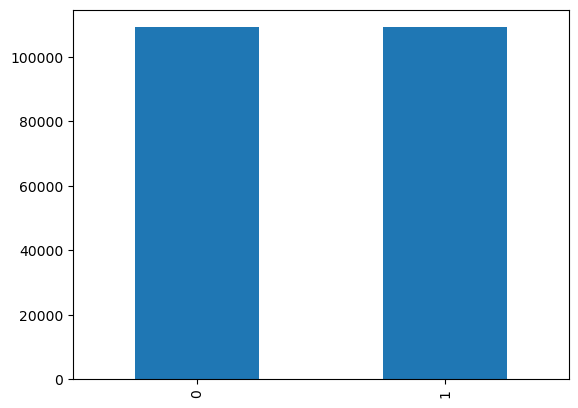

In [52]:
df['label'].value_counts().sort_index(ascending=True).plot(kind='bar')

## 형태소 분석 및 품사 태깅

In [53]:
from konlpy.tag import Okt
okt = Okt()

In [54]:
def tokenize(doc):
    #형태소와 품사를 join
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [55]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

In [61]:
train_docs = [(tokenize(row[0]), row[1]) for row in train_df.values]
test_docs = [(tokenize(row[0]), row[1]) for row in test_df.values]

In [62]:
print(train_docs[0])
print(test_docs[0])

(['매우/Noun', '한쪽/Noun', '으로/Josa', '편향/Noun', '되다/Verb', '선동/Noun', '영화/Noun', '마치/Noun', '나치/Noun', '프로파간다/Noun', '를/Josa', '보다/Verb', '기분/Noun'], 0)
(['초반/Noun', '에는/Josa', '몰입/Noun', '이/Josa', '안/VerbPrefix', '돼다/Verb', '김현주/Noun', '님/Suffix', '이/Josa', '연기/Noun', '가/Josa', '넘다/Verb', '리얼/Noun', '하다/Verb', '몰입/Noun', '이/Josa', '돼다/Verb', '많다/Adjective', '생각/Noun', '을/Josa', '하다/Verb', '되다/Verb', '영화/Noun', '인거/Josa', '같다/Adjective', '애/Noun', '요/Josa', '잘/VerbPrefix', '보다/Verb'], 1)


In [63]:
tokens = [t for d in train_docs for t in d[0]]
print("토큰개수:", len(tokens))

토큰개수: 2541219


In [64]:
import nltk
text = nltk.Text(tokens, name='NMSC')

#토큰개수
print(len(text.tokens))

#중복을 제외한 토큰개수
print(len(set(text.tokens)))

#출력빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(10))

2541219
46873
[('영화/Noun', 63014), ('하다/Verb', 58031), ('이/Josa', 54020), ('보다/Verb', 53712), ('의/Josa', 38466), ('에/Josa', 35980), ('가/Josa', 35354), ('을/Josa', 31605), ('도/Josa', 27073), ('들/Suffix', 25557)]


## 데이터 탐색

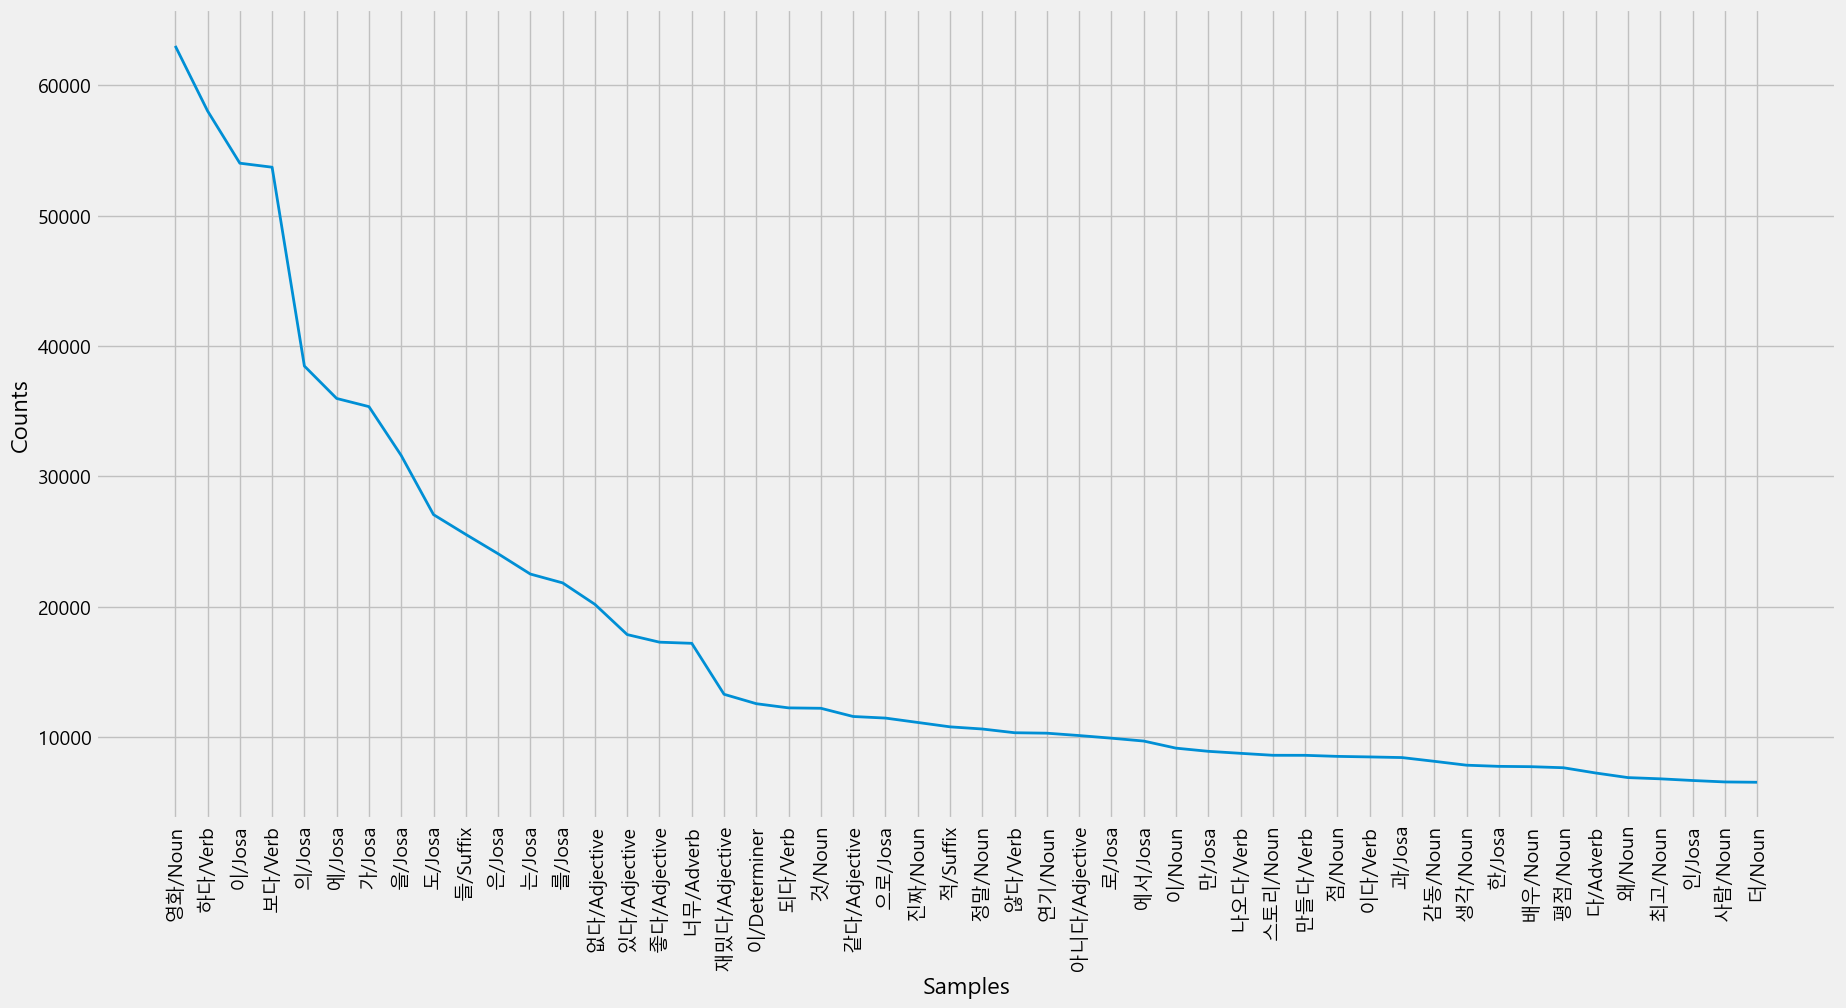

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,10))
text.plot(50)

In [68]:
FREQUENCY_COUNT = 100;

In [69]:
selected_words = [f[0] for f in text.vocab().most_common(FREQUENCY_COUNT)]

In [70]:
#단어리스트 문서에서 상위 10000개들중 포함되는 단어들이 개수
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [71]:
#문서에 들어가는 단어 개수
x_train = [term_frequency(d) for d,_ in train_docs]
x_test = [term_frequency(d) for d,_ in test_docs]

In [72]:
#라벨(1 or 0)
y_train = [c for _,c in train_docs]
y_test = [c for _,c in test_docs]

In [73]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

## 데이터 모델링

In [74]:
import tensorflow as tf

#레이어 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [75]:
#학습 프로세스 설정
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.binary_accuracy]
    )

In [76]:
#학습 데이터로 학습
model.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
342/342 [==============================] - 2s 3ms/step - loss: 0.5575 - binary_accuracy: 0.6989
Epoch 2/10
342/342 [==============================] - 1s 2ms/step - loss: 0.5283 - binary_accuracy: 0.7150
Epoch 3/10
342/342 [==============================] - 1s 2ms/step - loss: 0.5203 - binary_accuracy: 0.7208
Epoch 4/10
342/342 [==============================] - 1s 2ms/step - loss: 0.5145 - binary_accuracy: 0.7251
Epoch 5/10
342/342 [==============================] - 1s 2ms/step - loss: 0.5104 - binary_accuracy: 0.7284
Epoch 6/10
342/342 [==============================] - 1s 2ms/step - loss: 0.5070 - binary_accuracy: 0.7300
Epoch 7/10
342/342 [==============================] - 1s 2ms/step - loss: 0.5044 - binary_accuracy: 0.7315
Epoch 8/10
342/342 [==============================] - 1s 2ms/step - loss: 0.5019 - binary_accuracy: 0.7334
Epoch 9/10
342/342 [==============================] - 1s 2ms/step - loss: 0.5001 - binary_accuracy: 0.7347
Epoch 10/10
342/342 [================

## 모델 평가

In [77]:
results = model.evaluate(x_test, y_test)
results

1365/1365 [==============================] - 2s 981us/step - loss: 0.5173 - binary_accuracy: 0.7211


[0.5172842741012573, 0.7211086750030518]

In [78]:
#모델을 저장해둘수도 있다.
model.save('movie_review_model.h5')

# 모델 불러오기
#from keras.models import load_model
#model = load_model('movie_review_model.h5')

## 결과 예측하기

In [82]:
def predict_review():
    review = input('리뷰를 작성해주세요:')
    str = [review]
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    
    if(score > 0.5):
        print(f"({round((score)*100)}%)의 확률로 긍정적인 리뷰입니다")
    else:
        print(f"({round((1-score)*100)}%)의 확률로 부정적인 리뷰입니다")

In [87]:
predict_review()

리뷰를 작성해주세요: 진짜 지루하고 노잼이었어요


1/1 [==============================] - 0s 121ms/step
(95%)의 확률로 부정적인 리뷰입니다
